# Student Performance Analysis Using Python
### Name: Vipul Kumar Burnwal
### Tools: Python, Pandas, Matplotlib


## 1. Introduction
This project analyzes student academic performance using Python and data analysis techniques.
The goal is to identify performance trends and factors affecting results such as study hours and part-time jobs.


## 2. Dataset Description
The dataset contains around 9000 student records with features like gender, study hours,
part-time job status, and subject-wise marks in Math, Physics, and Chemistry.


## 2. Dataset Description
The dataset contains around 9000 student records with features like gender, study hours,
part-time job status, and subject-wise marks in Math, Physics, and Chemistry.


## 3. Data Cleaning and Preprocessing
Unnecessary columns were removed, missing values were handled, and duplicate records were deleted
to ensure accurate analysis.


## 4. Feature Engineering
New columns such as Average Marks, Result (Pass/Fail), and Final Grade were created from subject scores.


## 5. Data Analysis and Visualization
Various analyses were performed such as subject-wise performance, impact of study hours,
part-time job effects, and gender-wise comparison using graphs.


## 6. Conclusion
The analysis showed that higher study hours generally lead to better performance.
Students without part-time jobs performed slightly better.
Physics was observed as the most challenging subject.
These insights can help in improving academic strategies.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_excel("student_performance.xlsx")
df.head()

,Student_Names,Phone_No.,Gender,Study_Hours,Part_Time_Job,Math,Physics,Chemistry,Grade,Comment,Course_Recommendation,CourseCode,ListofCourses,RatingOfCourses
0,Santanika Sonkar,9906433252,Male,5,No,82,51,36,C,Below Average Achivement,"28_METE, 29_TEXE, 31_POLE",01_CSE,B.E/B.Tech in Computer Science & Engineering,5.0
1,Swaroop Pandey,9724400276,Female,4,Yes,42,46,40,D,Poor Pursuance,Better luck next time,02_CSAI,B.E/B.Tech in Computer Science & Engineering (AI),4.5
2,Vaijinath Sonkar,9866358126,Male,10,Yes,36,55,48,D,Poor Pursuance,Better luck next time,03_CSDS,B.E/B.Tech in Computer Science & Engineering (...,5.0
3,Roop Lal Kumari,9657626856,Male,8,No,71,67,34,C,Below Average Achivement,"28_METE, 29_TEXE, 31_POLE",04_CSR,B.E/B.Tech in Computer Science & Engineering (...,3.0
4,à¤œà¤¯à¤°à¤¾à¤® Maurrya,9804752911,Male,9,Yes,85,92,36,B+,Good Pursuance,"02_CSAI, 32_BC, 35_BSC",05_CSECS,B.E/B.Tech in Computer Science & Engineering (...,4.5


In [15]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_Names          9000 non-null   object 
 1   Phone_No.              9000 non-null   int64  
 2   Gender                 9000 non-null   object 
 3   Study_Hours            9000 non-null   int64  
 4   Part_Time_Job          9000 non-null   object 
 5   Math                   9000 non-null   int64  
 6   Physics                9000 non-null   int64  
 7   Chemistry              9000 non-null   int64  
 8   Grade                  9000 non-null   object 
 9   Comment                9000 non-null   object 
 10  Course_Recommendation  9000 non-null   object 
 11  CourseCode             72 non-null     object 
 12  ListofCourses          72 non-null     object 
 13  RatingOfCourses        72 non-null     float64
dtypes: float64(1), int64(5), object(8)
memory usage: 984.5+ 

,Phone_No.,Study_Hours,Math,Physics,Chemistry,RatingOfCourses
count,9.000000e+03,9000.000000,9000.000000,9000.000000,9000.000000,72.000000
mean,9.507629e+09,5.506111,55.247444,54.997667,55.088556,3.861111
std,2.851613e+08,2.854077,26.386672,26.353729,26.367833,1.123445
min,9.000085e+09,1.000000,10.000000,10.000000,10.000000,2.000000
25%,9.265506e+09,3.000000,32.000000,32.000000,32.000000,2.875000
50%,9.504948e+09,5.500000,55.000000,55.000000,56.000000,4.500000
75%,9.753774e+09,8.000000,78.000000,78.000000,78.000000,5.000000
max,9.999979e+09,10.000000,100.000000,100.000000,100.000000,5.000000


In [16]:
df[['Math','Physics','Chemistry']].mean()

Math         55.247444
Physics      54.997667
Chemistry    55.088556
dtype: float64

In [19]:
df.columns

Index(['Student_Names', 'Phone_No.', 'Gender', 'Study_Hours', 'Part_Time_Job',
       'Math', 'Physics', 'Chemistry', 'Grade', 'Comment',
       'Course_Recommendation', 'CourseCode', 'ListofCourses',
       'RatingOfCourses'],
      dtype='object')

In [21]:
df['Average'] = df[['Math','Physics','Chemistry']].mean(axis=1)

df['Result'] = df['Average'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')


In [22]:
df['Result'].value_counts()


Result
Pass    7528
Fail    1472
Name: count, dtype: int64

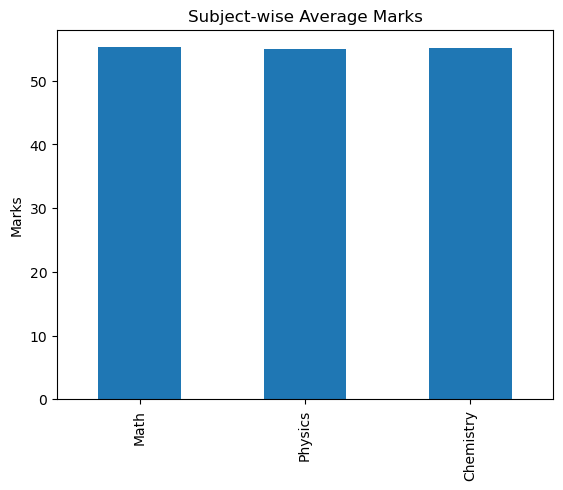

In [23]:
df[['Math','Physics','Chemistry']].mean().plot(kind='bar')
plt.title("Subject-wise Average Marks")
plt.ylabel("Marks")
plt.show()


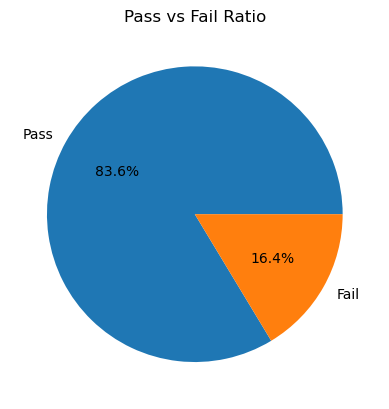

In [24]:
df['Result'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Pass vs Fail Ratio")
plt.ylabel("")
plt.show()


In [25]:
df.groupby('Study_Hours')['Average'].mean()


Study_Hours
1     56.093458
2     55.482771
3     54.118650
4     55.398418
5     55.317760
6     55.355081
7     55.100327
8     54.326296
9     55.201717
10    54.732405
Name: Average, dtype: float64

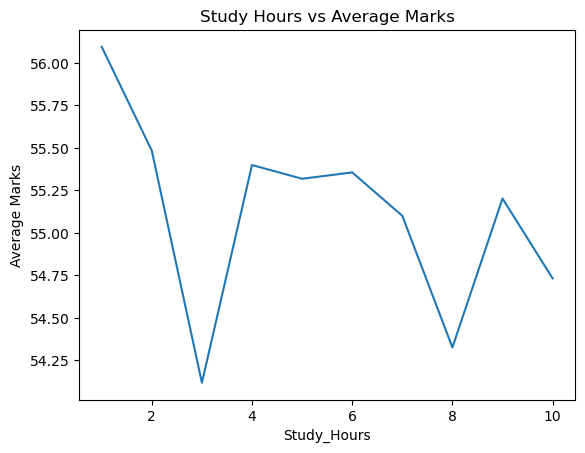

In [26]:
df.groupby('Study_Hours')['Average'].mean().plot(kind='line')
plt.title("Study Hours vs Average Marks")
plt.ylabel("Average Marks")
plt.show()


In [27]:
df.groupby('Part_Time_Job')['Average'].mean()


Part_Time_Job
No     55.346572
Yes    54.875139
Name: Average, dtype: float64

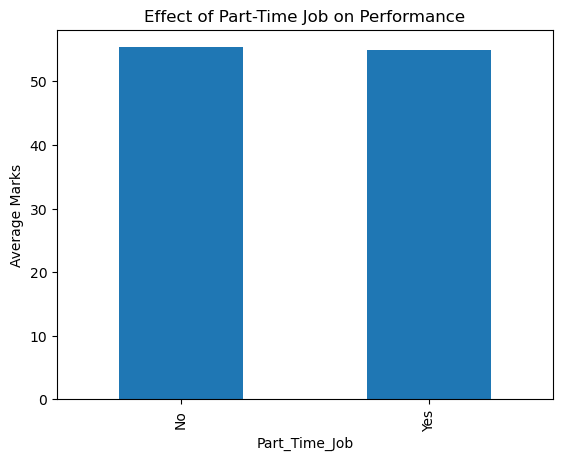

In [28]:
df.groupby('Part_Time_Job')['Average'].mean().plot(kind='bar')
plt.title("Effect of Part-Time Job on Performance")
plt.ylabel("Average Marks")
plt.show()


In [29]:
df.groupby('Gender')['Average'].mean()


Gender
Female    55.130141
Male      55.092387
Name: Average, dtype: float64

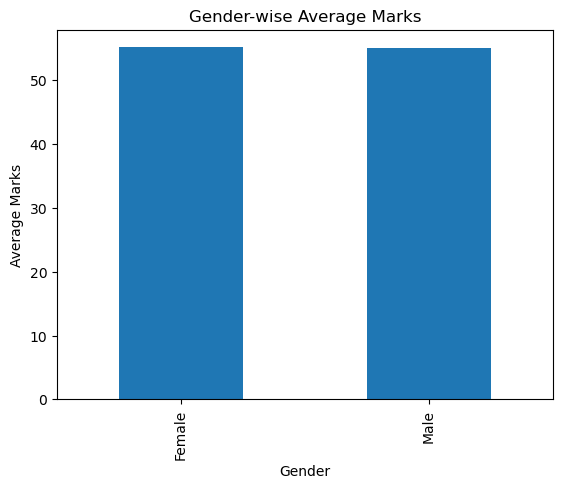

In [30]:
df.groupby('Gender')['Average'].mean().plot(kind='bar')
plt.title("Gender-wise Average Marks")
plt.ylabel("Average Marks")
plt.show()


In [31]:
df['Course_Recommendation'].value_counts().head(5)


Course_Recommendation
Better luck next time        3797
28_METE, 29_TEXE, 31_POLE    2167
04_CSR, 24_PROD, 13_CE        828
07_CSBS, 19_MECH, 27_DTE      802
02_CSAI, 32_BC, 35_BSC        510
Name: count, dtype: int64

In [32]:
df[['Math','Physics','Chemistry']].mean().idxmin()


'Physics'

From the analysis, it was observed that study hours positively affect academic performance. Students without part-time jobs performed slightly better on average. Among all subjects, Physics had the lowest average score, indicating it is the most difficult subject. These insights can help institutions focus on weak areas and provide targeted academic support.